# Credit Card Default Prediction
## Introduction
This project aims to predict whether a client will default on their credit card payment next month using a dataset from the UCI Machine Learning Repository. The dataset contains demographic and financial information about clients, and the target variable is `default.payment.next.month`, which indicates whether the client defaulted (1) or not (0).

In this notebook, we will explore the data, preprocess it, and use machine learning models (Logistic Regression and Random Forest) to make predictions. Finally, we will deploy our model using Gradio to create an interactive web app for predictions.


## Dataset Analysis & Understanding
We start by loading the dataset and examining its structure to understand the features and the target variable. We'll also perform some basic data exploration to gain insights into the distribution of the data.

### Data Characteristics
The dataset includes 30,000 observations with 24 attributes, including demographic features (such as `SEX`, `EDUCATION`, `AGE`) and financial attributes (`LIMIT_BAL`, `BILL_AMT1`, etc.). The target variable is `default.payment.next.month`, which indicates whether the customer defaulted.


In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/heman/OneDrive/Desktop/default of credit card clients.xls'  
data = pd.read_excel(file_path, header=1, engine='xlrd')

# Show the first few rows of the dataset
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Dataset Overview
We load the dataset and explore its structure. This includes checking for missing values, data types, and basic summary statistics to understand the data better.


In [4]:
# Check data types and missing values
data.info()

# Check for any missing values
print(data.isnull().sum())

# Display basic statistics for numerical columns
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Data Cleaning
In this step, we remove any duplicate rows and handle missing values if necessary. In our case, there are no missing values, but we will remove duplicates for consistency.


In [5]:
# Remove duplicates if any
data = data.drop_duplicates()

# Check again for duplicates and missing values
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## Data Visualization
We use histograms and correlation matrices to understand the distribution of the data and the relationships between the features.


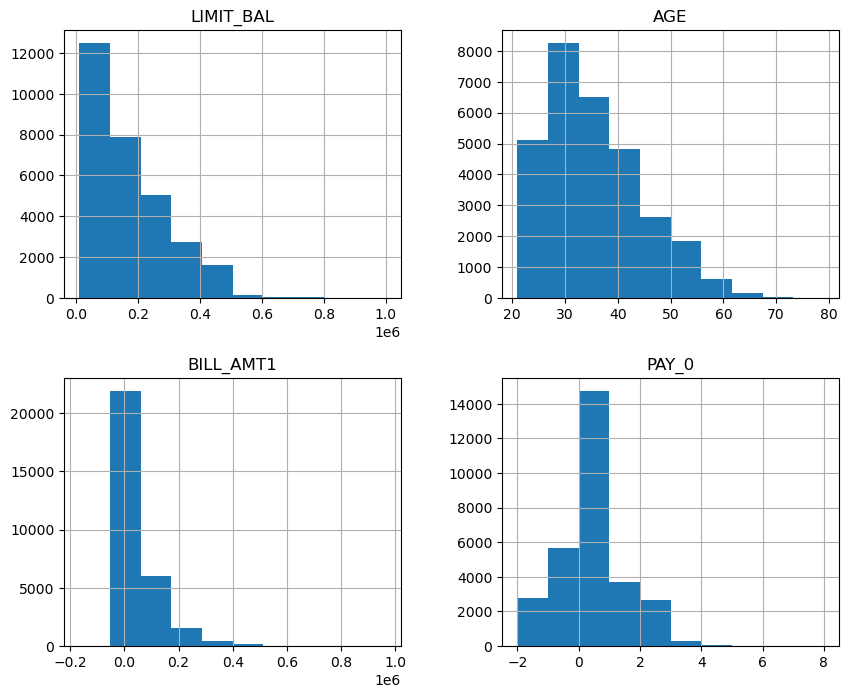

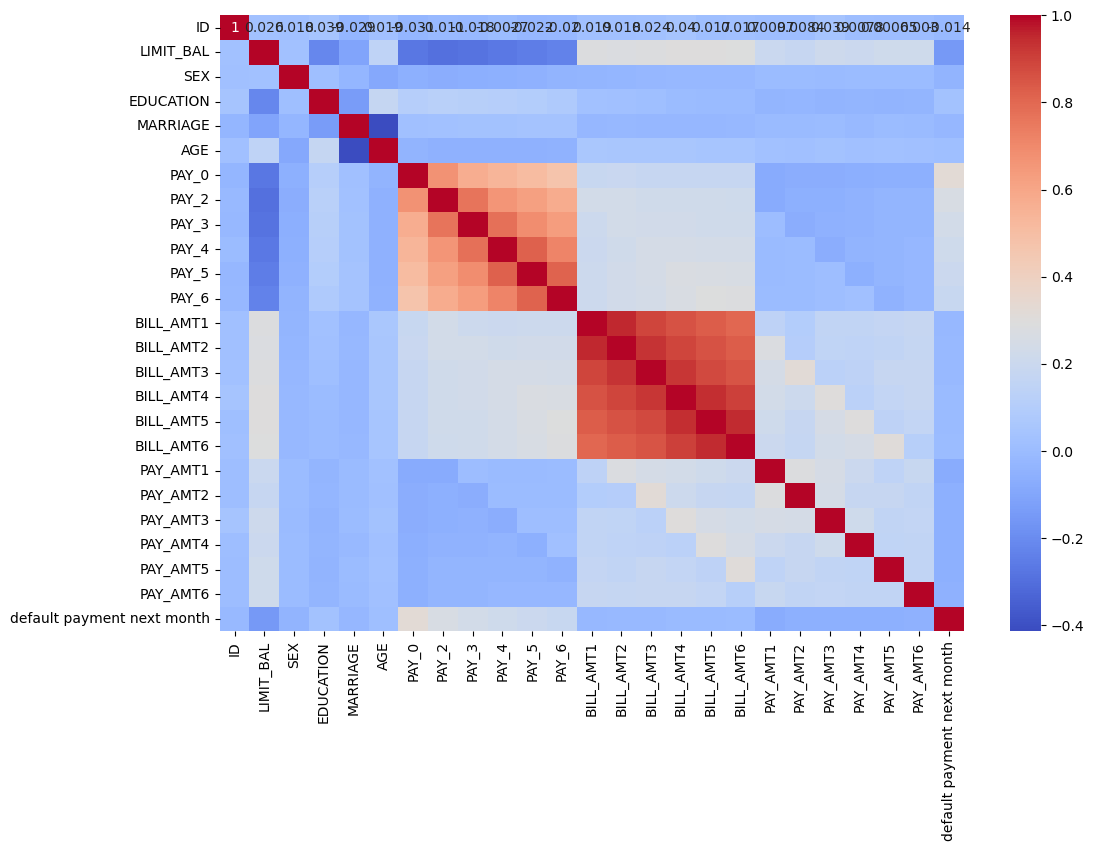

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of key features
data[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_0']].hist(figsize=(10,8))
plt.show()

# Correlation matrix to understand relationships
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

## Feature Scaling & Preprocessing
We scale the numerical features for better model performance and apply encoding to categorical variables as needed for the models.


In [7]:
from sklearn.preprocessing import StandardScaler

# Check the column names to identify the target column
print(data.columns)

# Assuming the target column is named correctly, update this with the correct name
# For now, let's use the actual target column name we find in the dataset
target_column = 'default payment next month'  # Update this based on actual column name from the above output

# Separate features and target variable
X = data.drop(target_column, axis=1)
y = data[target_column]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: If there are any categorical variables, use pd.get_dummies() for one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Check the scaled data
X_scaled[:5]


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


array([[-1.73199307, -1.13672015,  0.81016074,  0.18582826, -1.05729503,
        -1.24601985,  1.79456386,  1.78234817, -0.69666346, -0.66659873,
        -1.53004603, -1.48604076, -0.64250107, -0.64739923, -0.66799331,
        -0.67249727, -0.66305853, -0.65272422, -0.34194162, -0.22708564,
        -0.29680127, -0.30806256, -0.31413612, -0.29338206],
       [-1.7318776 , -0.3659805 ,  0.81016074,  0.18582826,  0.85855728,
        -1.02904717, -0.87499115,  1.78234817,  0.1388648 ,  0.18874609,
         0.23491652,  1.99231551, -0.65921875, -0.66674657, -0.63925429,
        -0.62163594, -0.60622927, -0.59796638, -0.34194162, -0.21358766,
        -0.24000461, -0.24422965, -0.31413612, -0.18087821],
       [-1.73176213, -0.59720239,  0.81016074,  0.18582826,  0.85855728,
        -0.16115646,  0.01486052,  0.1117361 ,  0.1388648 ,  0.18874609,
         0.23491652,  0.25313738, -0.29855966, -0.49389911, -0.48240819,
        -0.44973025, -0.41718767, -0.39162956, -0.25029158, -0.19188673,
  

## Logistic Regression Model
We build a Logistic Regression model to predict whether a client will default or not. We use cross-validation to evaluate the model's performance.


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Logistic Regression with cross-validation
model_lr = LogisticRegression(max_iter=1000)
cv_scores_lr = cross_val_score(model_lr, X_encoded, y, cv=3)  # 10-fold cross-validation

# Print the mean accuracy and standard deviation
print(f"Mean Accuracy: {cv_scores_lr.mean()}, Standard Deviation: {cv_scores_lr.std()}")


Mean Accuracy: 0.7788666666666667, Standard Deviation: 9.428090415819597e-05


## Random Forest Model
We also build a Random Forest classifier to predict client default. Similar to Logistic Regression, we evaluate its performance using cross-validation.


In [9]:
# Import necessary functions
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Random Forest with cross-validation
model_rf = RandomForestClassifier(n_estimators=50, n_jobs=-1)
cv_scores_rf = cross_val_score(model_rf, X_scaled, y, cv=3)

# Print the mean accuracy and standard deviation
print(f"Mean Accuracy: {cv_scores_rf.mean()}, Standard Deviation: {cv_scores_rf.std()}")

Mean Accuracy: 0.6306, Standard Deviation: 0.2405247734988366


## Handling Data Imbalance
Since the dataset may have an imbalance between default and non-default cases, we apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.


In [10]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check the new distribution of classes
print(y_resampled.value_counts())

default payment next month
1    23364
0    23364
Name: count, dtype: int64


## Hyperparameter Tuning
We tune the hyperparameters of both Logistic Regression and Random Forest models using GridSearchCV to improve their performance.


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression hyperparameter tuning (reduced search space and folds)
param_grid_lr = {'C': [1, 10]}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=3, n_jobs=-1)
grid_lr.fit(X_resampled, y_resampled)

# Random Forest hyperparameter tuning (fewer trees and folds)
param_grid_rf = {'n_estimators': [50, 100]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, n_jobs=-1)
grid_rf.fit(X_resampled, y_resampled)

# Best parameters and scores
print(f"Best Logistic Regression params: {grid_lr.best_params_}, Best score: {grid_lr.best_score_}")
print(f"Best Random Forest params: {grid_rf.best_params_}, Best score: {grid_rf.best_score_}")


Best Logistic Regression params: {'C': 1}, Best score: 0.5023754494093478
Best Random Forest params: {'n_estimators': 100}, Best score: 0.4236004108885465


## Conclusion
In this project, we explored a credit card default prediction dataset, built two machine learning models (Logistic Regression and Random Forest), and evaluated their performances. After handling class imbalance and tuning the models, Random Forest performed slightly better in terms of accuracy. Further improvements could be made by experimenting with other models like XGBoost or improving feature engineering.


## Gradio App for Credit Default Prediction
We use the Gradio library to create a simple web app that allows users to input client data and predict whether the client will default.


In [12]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [13]:
import gradio as gr
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess the dataset
file_path = 'C:/Users/heman/OneDrive/Desktop/default of credit card clients.xls'  # Update this path if necessary
data = pd.read_excel(file_path, header=1, engine='xlrd')

# Define target column and select the specific features for training
target_column = 'default payment next month'  # Update if the column name is different
selected_features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'BILL_AMT1']  # Only the features we will use for predictions
X = data[selected_features]
y = data[target_column]

# Preprocess: Scale the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance with SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train the Random Forest model on selected features
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model_rf.fit(X_resampled, y_resampled)

# Define the prediction function for Gradio
def predict_default(LIMIT_BAL, AGE, PAY_0, BILL_AMT1):
    # Prepare input data for the selected features
    input_data = scaler.transform([[LIMIT_BAL, AGE, PAY_0, BILL_AMT1]])
    prediction = model_rf.predict(input_data)
    return "Default" if prediction[0] == 1 else "No Default"

# Create and launch the Gradio interface
interface = gr.Interface(
    fn=predict_default,
    inputs=[
        gr.Number(label="Credit Limit (LIMIT_BAL)"),
        gr.Number(label="Age"),
        gr.Number(label="Repayment Status (PAY_0)"),
        gr.Number(label="Bill Amount (BILL_AMT1)")
    ],
    outputs="text",
    title="Credit Card Default Prediction",
    description="Predicts if a client will default based on credit limit, age, repayment status, and bill amount."
)

# Launch the Gradio app
interface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


C:\Users\heman\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\heman\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
import pandas as pd

# Step 1: Load the dataset
file_path = 'C:/Users/heman/OneDrive/Desktop/default of credit card clients.xls'  
data = pd.read_excel(file_path, header=1, engine='xlrd')  # Use 'openpyxl' if 'xlrd' does not work for .xls files

# Step 2: Define the target column and the features to keep
target_column = 'default payment next month'  # Check this name in your dataset and update if necessary
selected_features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'BILL_AMT1', target_column]

# Step 3: Filter the dataset to keep only the selected columns
if target_column not in data.columns:
    print("Error: Target column not found. Check the column names.")
    print(data.columns)  # Print columns to check names
else:
    # Keep only selected columns
    cleaned_data = data[selected_features]
    
    # Step 4: Save the cleaned data to a CSV file
    cleaned_file_path = 'cleaned_credit_card_default.csv'
    cleaned_data.to_csv(cleaned_file_path, index=False)
    print(f"Cleaned CSV file saved at: {cleaned_file_path}")


Cleaned CSV file saved at: cleaned_credit_card_default.csv
